## 1. Importing Required Libraries

This step imports all the necessary Python libraries used for data analysis, visualization, and machine learning.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Loading the Dataset

The House Prices dataset is loaded using pandas.  
This dataset contains housing features along with the target variable `SalePrice`.


In [20]:
df = pd.read_csv("../dataset/train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
df.shape


(1460, 81)

## 3. Dataset Overview

The dataset consists of 1460 records and 81 features, including numerical and categorical variables.
The target variable is `SalePrice`, which represents the final selling price of houses.


In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 4. Target Variable Analysis

This section analyzes the distribution and scale of the target variable `SalePrice`.


In [24]:
df["SalePrice"].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## 5. Exploratory Data Analysis (EDA)

EDA helps in understanding the distribution of house prices and identifying skewness and outliers.


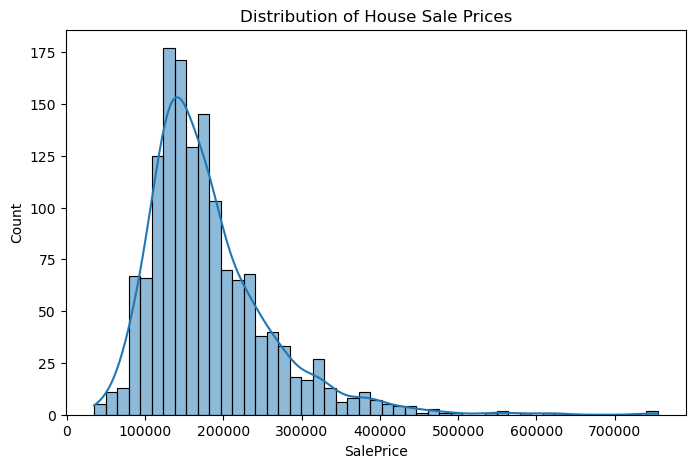

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribution of House Sale Prices")
plt.show()


The distribution of house prices is right-skewed with the presence of high-value outliers.
This suggests that a log transformation of the target variable may improve model performance.


## 6. Correlation Analysis

This step identifies features that have strong correlation with the target variable.


In [26]:
corr = df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)
corr.head(10)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

Features such as OverallQual, GrLivArea, and GarageCars show strong positive correlation with SalePrice.


## 7. Log Transformation of Target Variable

Log transformation is applied to reduce skewness and stabilize variance in the target variable.
ed = pd.get_dummies(df, drop_first=True)


In [27]:
df["SalePrice"] = np.log1p(df["SalePrice"])


In [28]:
df["SalePrice"].describe()


count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

## 8. Handling Missing Values

Missing numerical values are filled using the median,
and missing categorical values are filled using the most frequent category.


In [29]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


## 9. Encoding Categorical Variables

Categorical features are converted into numerical format using one-hot encoding.


In [30]:
df_encoded = pd.get_dummies(df, drop_first=True)


## 10. Train-Test Split

The dataset is split into training and testing sets to evaluate model performance.


In [31]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [32]:
X_train.shape, X_test.shape


((1168, 245), (292, 245))

## 11. Linear Regression Model

Linear Regression is used as a baseline model to predict house prices.


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

r2_lr, rmse_lr


(0.7565762022249763, np.float64(0.21313271815677096))

## 12. Conclusion (Linear Regression)

The Linear Regression model provides a strong baseline with a good R² score.
However, more advanced models such as Random Forest may further improve performance.


## 13. Random Forest Regressor

Random Forest is an ensemble learning algorithm that combines multiple decision trees
to improve prediction accuracy and reduce overfitting.


In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


## 14. Model Evaluation (Random Forest)

The performance of the Random Forest model is evaluated using R² score and RMSE.


In [35]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

r2_rf, rmse_rf


(0.8834356208901977, np.float64(0.14748625027420975))

## 15. Model Comparison

The performance of Linear Regression and Random Forest models is compared below.


In [36]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R2 Score": [r2_lr, r2_rf],
    "RMSE": [rmse_lr, rmse_rf]
})

comparison


,Model,R2 Score,RMSE
0,Linear Regression,0.756576,0.213133
1,Random Forest,0.883436,0.147486


## 16. Final Conclusion

Two machine learning models were implemented for house price prediction.
Linear Regression provided a reasonable baseline performance.
Random Forest Regressor significantly improved prediction accuracy,
achieving a higher R² score and lower RMSE.

This demonstrates the effectiveness of ensemble models in handling
complex, non-linear relationships in real-world datasets.
